# Cleaning

To avoid the main notebook becoming too cluttered this notebook will be used strictly for data cleaning and processing. 

In [2]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Accessing the dataset and loading the first 5 rows for reference.

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
# Taking a look at some of the numerical data of the dataframe.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [5]:
# A view of some of the information in our data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Columns that are not numeric :
    #date-will likely be removed
    #waterfront
    #view
    #condition
    #grade
    #sqft_basement

In [7]:
# Year built dispersion

df.yr_built.describe()

count   21597.00
mean     1971.00
std        29.38
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

In [8]:
# Info on square footage of living space

df['sqft_living'].describe()

count   21597.00
mean     2080.32
std       918.11
min       370.00
25%      1430.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

In [9]:
# Number of houses that fall under each level of condition

df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [10]:
# Stats for floor counts

df['floors'].value_counts()

1.00    10673
2.00     8235
1.50     1910
3.00      611
2.50      161
3.50        7
Name: floors, dtype: int64

In [11]:
# Upon first glance one might think this category has something to do with slope of the ground where the house is located,
# but after looking at the King County website we see that it represents the construction quality of the building,
# where 1 is the lowest and 13 the highest which is considered "Mansion Level". 

df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

#### Basement Square Footage

In [12]:
# Its odd that this column is an object and not numerical, so Im using this function to take a look at the values
#to see if we can learn anything.

df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [13]:
#So there was a "?" inputted, we will remove that so we can turn this column into a float.

df = df[df.sqft_basement != '?']
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [14]:
# Check to make sure the changes are reflected in the basement column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

***

There are still a few columns that need to be addressed so that they can be properly used in our modeling. Namely the columns that have their type listed as "object" which keeps us from being able to use their numerical values. I am not too concerned with 'date' right now and 'waterfront' will be determined as we continue to work on the data.

#### Waterfront

***

In [15]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [16]:
df.waterfront.value_counts()

NO     18662
YES      142
Name: waterfront, dtype: int64

In [17]:
df['waterfront'].isna().sum()

2339

In [18]:
# The overwhelming majority of properties are NOT listed as waterfront, therefore I feel
# comfortable filling the Nan values as also not being waterfront.
#After that I will convert the YES/NO's into 1/0's to make the column numeric.

df['waterfront'].fillna(df['waterfront'].mode().values[0], inplace = True)


In [19]:
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

In [20]:
# Checking for success...
df.waterfront

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, Length: 21143, dtype: int64

In [21]:
df.waterfront.isna().sum()

0

### View

In [22]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [23]:
df['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [24]:
df['view'].isna().sum()

61

Over 90% of the properties have no view listed, and since there are missing values and the column is listed as an object, this category will just be dropped.

#### Condition

In [25]:
df.condition.value_counts()

Average      13726
Good          5557
Very Good     1666
Fair           166
Poor            28
Name: condition, dtype: int64

In [26]:
df.condition.isna().sum()

0

In [27]:
# In this cell I will run a process called label encoding which will create numeric values.
import sklearn
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

label_encoder = preprocessing.LabelEncoder()

df['condition']= label_encoder.fit_transform(df['condition'])


In [28]:
df.condition.value_counts()

0    13726
2     5557
4     1666
1      166
3       28
Name: condition, dtype: int64

In [29]:
# We see that the column is now an integer.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21082 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

***


#### Year Renovated

In [30]:
df['yr_renovated'].isna().sum()

3754

In [31]:
df['yr_renovated'].shape

(21143,)

In [32]:
df['yr_renovated'].value_counts()

0.00       16666
2014.00       69
2003.00       31
2013.00       31
2007.00       30
           ...  
1953.00        1
1944.00        1
1934.00        1
1971.00        1
1959.00        1
Name: yr_renovated, Length: 69, dtype: int64

The question here is whether we want to make the assumption that these null values which make up 17% of this set are null because the house was never renovated. We see that out of the total data frame of over 21,000 there are almost 17,000 houses confirmed with no renovation. Instead of dropping the 3,754 null values I will just change them into not being renovated so we do not have to remove those sales from the data set.


In [33]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].isna().sum()

0

#### Bedrooms

In [34]:
df['bedrooms'].value_counts()

3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
# After a quick look we see that the most common number of bedrooms goes in the order of 3,4,2,5. Which seems
# perfectly logical. However while 10 and 11 bedrooms in a house could be possible, having 33 seems completely
# unlikely, if I had to take a guess this value was fat-fingered in. Therefore I will remove it to avoid ouliers.

df = df[(df.bedrooms != 33)]

****

In [36]:
# Taking a look at our dataset which should be close to fully cleaned now.
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             61
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   date           21142 non-null  object 
 2   price          21142 non-null  float64
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   waterfront     21142 non-null  int64  
 9   view           21081 non-null  object 
 10  condition      21142 non-null  int64  
 11  grade          21142 non-null  object 
 12  sqft_above     21142 non-null  int64  
 13  sqft_basement  21142 non-null  float64
 14  yr_built       21142 non-null  int64  
 15  yr_renovated   21142 non-null  float64
 16  zipcode        21142 non-null  int64  
 17  lat            21142 non-null  float64
 18  long  

In [38]:
print(df.shape)


(21142, 21)


The only column with null values is 'view' which we decided to drop since it was so small. And the last columns that are objects are view and date, the date column can also be dropped. In addition, the id column serves no purpose, the longitude and latitude values are not necessary, and the square footage of the nearest 15 neighbors is not relevant. Therefore these will be dropped as well.

In [39]:
# Dropping last columns and creating final cleaned dataframe:
df = df.drop(columns = [ 'id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode'])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.00,3,1.00,1180,5650,1.00,0,0,7 Average,1180,0.00,1955,0.00
1,538000.00,3,2.25,2570,7242,2.00,0,0,7 Average,2170,400.00,1951,1991.00
2,180000.00,2,1.00,770,10000,1.00,0,0,6 Low Average,770,0.00,1933,0.00
3,604000.00,4,3.00,1960,5000,1.00,0,4,7 Average,1050,910.00,1965,0.00
4,510000.00,3,2.00,1680,8080,1.00,0,0,8 Good,1680,0.00,1987,0.00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21142 non-null  float64
 1   bedrooms       21142 non-null  int64  
 2   bathrooms      21142 non-null  float64
 3   sqft_living    21142 non-null  int64  
 4   sqft_lot       21142 non-null  int64  
 5   floors         21142 non-null  float64
 6   waterfront     21142 non-null  int64  
 7   condition      21142 non-null  int64  
 8   grade          21142 non-null  object 
 9   sqft_above     21142 non-null  int64  
 10  sqft_basement  21142 non-null  float64
 11  yr_built       21142 non-null  int64  
 12  yr_renovated   21142 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 2.3+ MB


#### Grade

The dataframe is almost where we need it to be, the column 'grade' now needs to be altered so that it contains strictly numeric values so it can be used in the models.

In [41]:
dummies = pd.get_dummies(df['grade'], drop_first=True)
dummies.head()


,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


In [42]:
df_clean = pd.concat([df.drop('grade', axis =1), dummies], axis =1 )
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,221900.00,3,1.00,1180,5650,1.00,0,0,1180,0.00,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2570,7242,2.00,0,0,2170,400.00,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,770,10000,1.00,0,0,770,0.00,...,0,0,0,0,0,0,1,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,0,4,1050,910.00,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1680,8080,1.00,0,0,1680,0.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,0,0,1530,0.00,...,0,0,0,0,0,0,0,0,1,0
21593,400000.00,4,2.50,2310,5813,2.00,0,0,2310,0.00,...,0,0,0,0,0,0,0,0,1,0
21594,402101.00,2,0.75,1020,1350,2.00,0,0,1020,0.00,...,0,0,0,0,0,0,0,1,0,0
21595,400000.00,3,2.50,1600,2388,2.00,0,0,1600,0.00,...,0,0,0,0,0,0,0,0,1,0


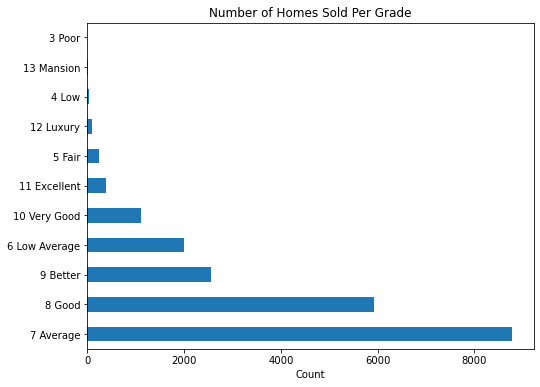

In [43]:
fig, ax = plt.subplots(figsize = (8,6))
df['grade'].value_counts().plot(kind='barh')
ax.set_title('Number of Homes Sold Per Grade')
ax.set_xlabel('Count');

****

Here is one last look at the new dataframe confirming everything is properly cleaned and ready for modeling.

From here is where we we will begin to find correlations between home features and a higher selling price.


In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21142 non-null  float64
 1   bedrooms       21142 non-null  int64  
 2   bathrooms      21142 non-null  float64
 3   sqft_living    21142 non-null  int64  
 4   sqft_lot       21142 non-null  int64  
 5   floors         21142 non-null  float64
 6   waterfront     21142 non-null  int64  
 7   condition      21142 non-null  int64  
 8   sqft_above     21142 non-null  int64  
 9   sqft_basement  21142 non-null  float64
 10  yr_built       21142 non-null  int64  
 11  yr_renovated   21142 non-null  float64
 12  11 Excellent   21142 non-null  uint8  
 13  12 Luxury      21142 non-null  uint8  
 14  13 Mansion     21142 non-null  uint8  
 15  3 Poor         21142 non-null  uint8  
 16  4 Low          21142 non-null  uint8  
 17  5 Fair         21142 non-null  uint8  
 18  6 Low 

In [45]:
print(df.shape)
print(df_clean.shape)

(21142, 13)
(21142, 22)


In [46]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00
mean,540506.02,3.37,2.12,2080.94,15087.57,1.49,0.01,0.85,1789.10,291.84,1971.02,68.26
std,368083.13,0.90,0.77,918.56,41210.13,0.54,0.08,1.27,828.41,442.50,29.32,362.77
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,370.00,0.00,1900.00,0.00
25%,322000.00,3.00,1.75,1430.00,5043.00,1.00,0.00,0.00,1200.00,0.00,1952.00,0.00
50%,450000.00,3.00,2.25,1910.00,7620.00,1.50,0.00,0.00,1560.00,0.00,1975.00,0.00
75%,645000.00,4.00,2.50,2550.00,10695.75,2.00,0.00,2.00,2210.00,560.00,1997.00,0.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,9410.00,4820.00,2015.00,2015.00


****

### Initial Correlations 

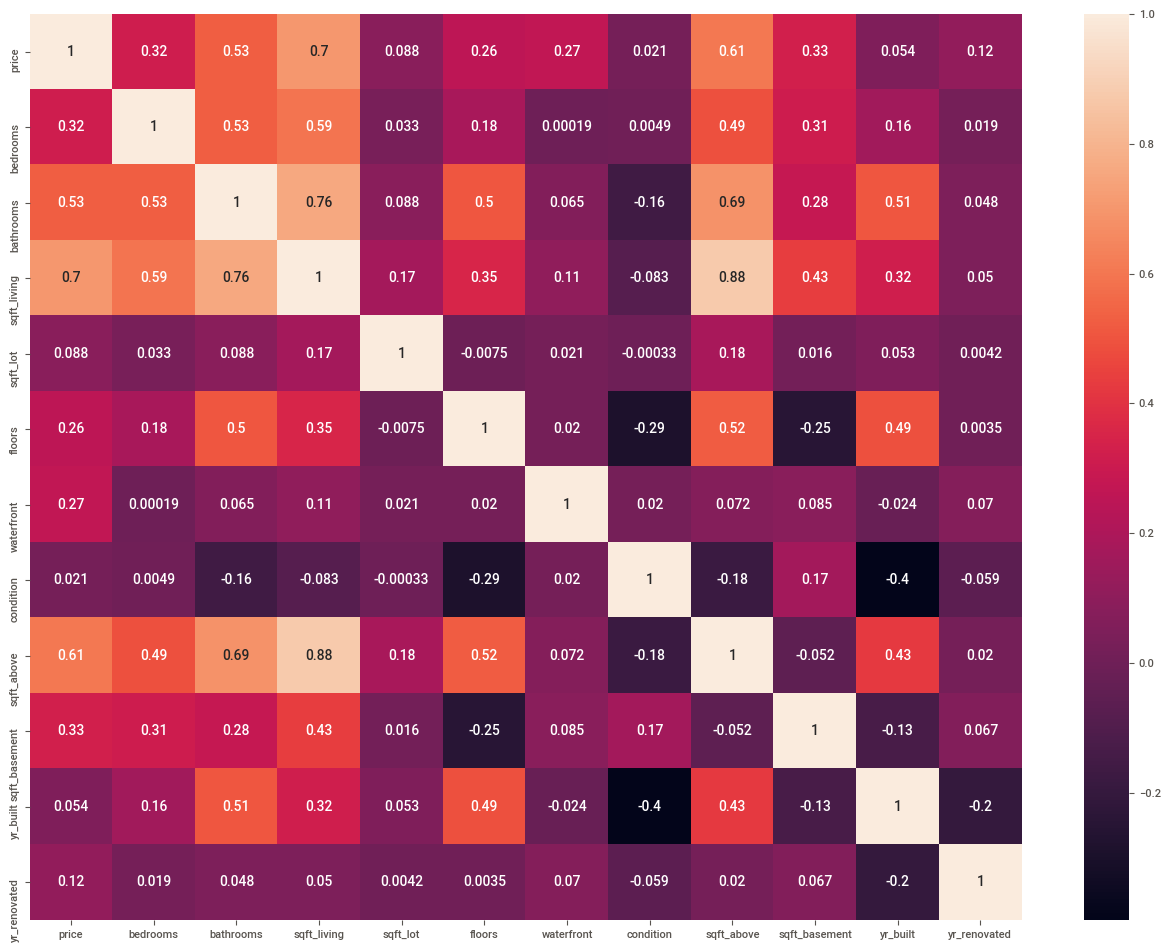

In [63]:
# Creating a heatmap, and to aid in identifying correaltions, including annotations.
# Here I am using the dataframe without the dummies added to the 'grade' category to
# avoid an over-complicated heatmap
corr_x = df.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr_x, annot=True );

In [48]:
# Here is a table which will be easier to read with our new data frame which has several 
# additional columns due to the 'grade' values being separated:

df_clean_corr=df_clean.corr()['price'].map(abs).sort_values(ascending = False)
df_clean_corr

price           1.00
sqft_living     0.70
sqft_above      0.61
bathrooms       0.53
11 Excellent    0.36
sqft_basement   0.33
bedrooms        0.32
7 Average       0.32
12 Luxury       0.29
waterfront      0.27
floors          0.26
9 Better        0.23
13 Mansion      0.21
6 Low Average   0.21
yr_renovated    0.12
sqft_lot        0.09
5 Fair          0.08
yr_built        0.05
4 Low           0.03
condition       0.02
3 Poor          0.01
8 Good          0.01
Name: price, dtype: float64

Generally anything with a correlation above 0.7 is considered 'High' and anything between 0.5-0.7 is 'Moderate'.
The variables here that fall into 'High' are square footage living space and square footabe above basement. While bathrooms are considered a 'Moderate' correlated variable.

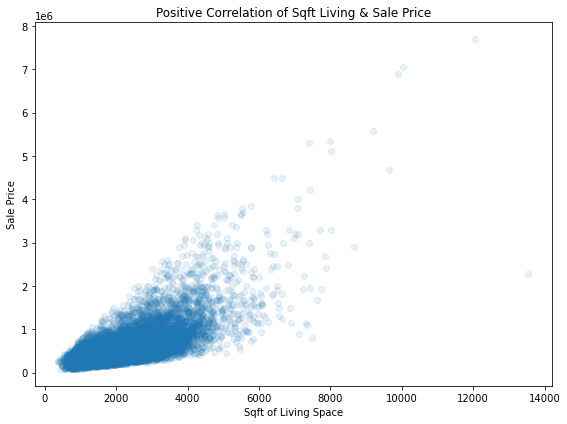

In [50]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(df_clean['sqft_living'], df_clean['price'], alpha = .1)
ax.set_xlabel('Sqft of Living Space')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation of Sqft Living & Sale Price')
plt.tight_layout()

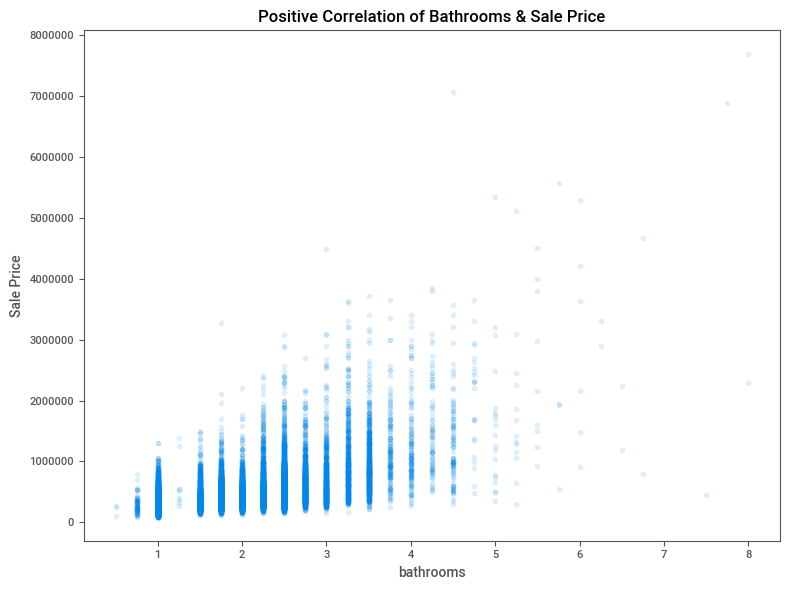

In [67]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(df_clean['bathrooms'], df_clean['price'], alpha = .1)
ax.set_xlabel('bathrooms')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation of Bathrooms & Sale Price')
plt.tight_layout()

In [51]:
# Split into X and Y.
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X = sm.add_constant(X)
X.shape, y. shape

((21142, 22), (21142,))

### Multicollinearity

Now would be a good time to check for multicollinearity, which can adversely effect our model if it is not dealt with. We will check to see if there are multiple predictors that have a high correlation with each other that need to be removed.

In [52]:
#creating a new dataframe of using absolute values
pairs_df = df_clean.corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['pairs']=list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['pairs'], inplace=True)
pairs_df.drop(columns=['level_1', 'level_0'], inplace = True)

#rename correlation column as cc rather than 0

pairs_df.columns = ['cc']

# drop duplicates

pairs_df.drop_duplicates(inplace = True)

# setting a range
pairs_df[(pairs_df.cc>.75) & (pairs_df.cc<1)]

pairs_df.head(3)

,cc
pairs,
"(price, price)",1.00
"(sqft_above, sqft_living)",0.88
"(sqft_living, bathrooms)",0.76


So after running that function we see some high correlations, we will remove 'sqft_living' since it is present in both items. 

In [53]:
df_clean.drop=df_clean.drop(columns = ['sqft_living'], inplace = True)

****

In [108]:
# Writing a function to create VIF dictionary.
#def create_vif_dictionary(X):
#    """
#    Parameters
 #   ----------
  #  X: Pandas dataframe of predictive variables only.
   #     Should have `.columns` and `.values` attributes.
    #"""
    
#    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
#    for i in range(len(X.columns)):
        # Calculate VIF
#        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
#        v = X.columns[i]
        
        # Set value in dictionary.
#        vif_dct[v] = vif

#    return vif_dct



### Modeling 

In [55]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2196.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        10:55:30   Log-Likelihood:            -2.8907e+05
No. Observations:               21142   AIC:                         5.782e+05
Df Residuals:                   21121   BIC:                         5.783e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.995e+06   1.38e+05     50.804      0.000    6.72e+06    7.26e+06
bedrooms      -3.017e+04   2125.924    -14.192      0.000   -3.43e+04    -2.6e+04
bathrooms      4.939e+04   3457.563     14.284      0.000    4.26e+04    5.62e+04
sqft_living     102.5007      2.293     44.701      0.000      98.006     106.995
sqft_lot         -0.2479      0.036     -6.866      0.000      -0.319      -0.177
floors         4.223e+04   3722.699     11.343      0.000    3.49e+04    4.95e+04
waterfront     7.242e+05    1.8e+04     40.333      0.000    6.89e+05    7.59e+05
condition      1.291e+04   1277.895     10.102      0.000    1.04e+04    1.54e+04
sqft_above       30.2626      2.242     13.499      0.000      25.868      34.657
sqft_basement    72.2383      2.694     26.818      0.000      66.958      77.518
yr_built      -3285.3635     70.225    -46.783      0.000   -3423.011   -3147.716
yr_renovated     24.9082      4.208      5.919      0.000      16.660      33.156
11 Excellent   2.772e+05   1.26e+04     22.014      0.000    2.53e+05    3.02e+05
12 Luxury      7.641e+05   2.38e+04     32.064      0.000    7.17e+05    8.11e+05
13 Mansion     1.964e+06   5.97e+04     32.924      0.000    1.85e+06    2.08e+06
3 Poor        -5.912e+05    2.1e+05     -2.813      0.005      -1e+06   -1.79e+05
4 Low         -5.634e+05   4.16e+04    -13.529      0.000   -6.45e+05   -4.82e+05
5 Fair        -5.732e+05   1.68e+04    -34.191      0.000   -6.06e+05    -5.4e+05
6 Low Average  -5.19e+05   1.04e+04    -50.026      0.000   -5.39e+05   -4.99e+05
7 Average     -4.371e+05   8592.957    -50.871      0.000   -4.54e+05    -4.2e+05
8 Good        -3.414e+05   7884.979    -43.304      0.000   -3.57e+05   -3.26e+05
9 Better      -1.876e+05   7782.271    -24.104      0.000   -2.03e+05   -1.72e+05
==============================================================================
Omnibus:                    11915.578   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389051.686
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                      23.577   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
import sweetviz as sv
report = sv.analyze(df_clean)
report.show_html("./report.html")


Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***